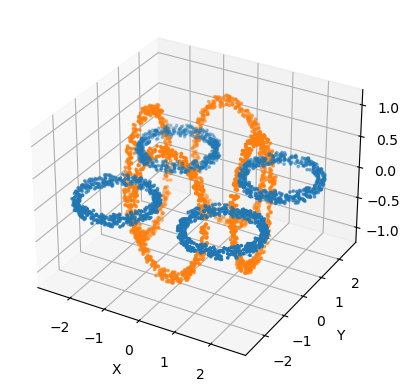

In [20]:
import numpy as np
import matplotlib.pyplot as plt
data= np.loadtxt("dataset-vis-exam2022.txt", delimiter=",") # load in data
# Regular 3d Plot

#Split into first and last part of dataset
X1 = data[:2000,0]
Y1 = data[:2000,1]
Z1 = data[:2000,2]

X2 = data[2000:,0]
Y2 = data[2000:,1]
Z2 = data[2000:,2]


fig = plt.figure()
# Plot in 3d-space
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, Y1, Z1, s = 3)
ax.scatter(X2, Y2, Z2, s = 3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig("original.png")

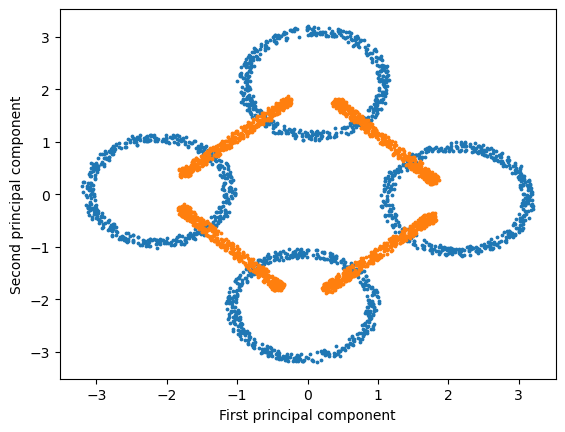

In [21]:
from sklearn.decomposition import PCA # Import PCA
#PCA on non-standardized data
pca = PCA(whiten=False, svd_solver = "full", n_components = 2) #Intialize PCA
pca.fit(data) #Fit PCA to data
pca_projection = pca.transform(data) # Calculate the projection of training data onto first two principal components by matrixmultiplication

X1 = pca_projection[:2000,0]
Y1 = pca_projection[:2000,1]

X2 = pca_projection[2000:,0]
Y2 = pca_projection[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 3)
ax.scatter(X2, Y2, s = 3)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

plt.savefig("pca.png")

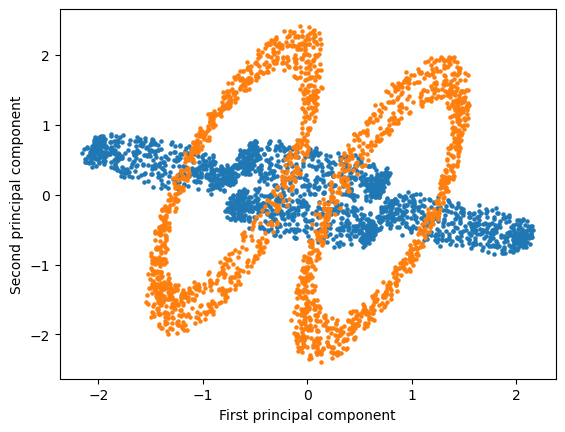

In [22]:
# PCA on normalized data

mu = np.mean(data, axis=0) # Compute mean of each feature
sd = np.std(data, axis=0, ddof = 0) # Compute (in-sample) standard deviation of each feature
def normalize(X,mean,sd): # Function to normalize array given mean and standard deviation
     D = np.diag(1/sd) # diagonalize std deviation vector
     return X @ D - mu @ D
data_norm = normalize(data, mu, sd)


pca_norm = PCA(whiten=False, svd_solver = "full", n_components = 2) #Intialize PCA
pca_norm.fit(data_norm) #Fit PCA to normalized data
pca_projection_norm = pca_norm.transform(data_norm)

X1 = pca_projection_norm[:2000,0]
Y1 = pca_projection_norm[:2000,1]

X2 = pca_projection_norm[2000:,0]
Y2 = pca_projection_norm[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

plt.savefig("pca_normalized.png")

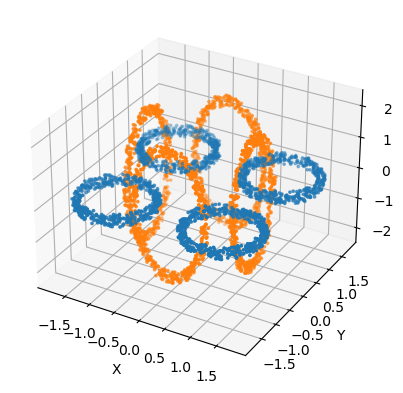

In [23]:
#Split into first and last part of dataset
X1 = data_norm[:2000,0]
Y1 = data_norm[:2000,1]
Z1 = data_norm[:2000,2]

X2 = data_norm[2000:,0]
Y2 = data_norm[2000:,1]
Z2 = data_norm[2000:,2]


fig = plt.figure()
# Plot in 3d-space
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, Y1, Z1, s = 3)
ax.scatter(X2, Y2, Z2, s = 3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig("original1.png")

In [24]:
from sklearn.manifold import TSNE
def tsne_plot(data, init, perplexity,init_name):

    filename = "tsne" + init_name + str(perplexity)+".png"
    
    tsne = TSNE(learning_rate="auto", init = init, n_jobs=-1, perplexity=perplexity, random_state=120).fit_transform(data)
    X1 = tsne[:2000,0]
    Y1 = tsne[:2000,1]

    X2 = tsne[2000:,0]
    Y2 = tsne[2000:,1]
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(X1, Y1, s = 5)
    ax.scatter(X2, Y2, s = 5)
    ax.set_title("t-SNE, Perplexity=" + str(perplexity))
    ax.set_xlabel("t-SNE dimension 1")
    ax.set_ylabel("t-SNE dimension 2")
    plt.savefig(filename)

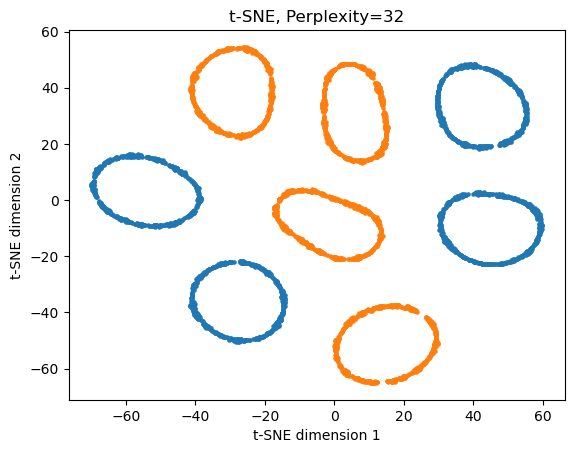

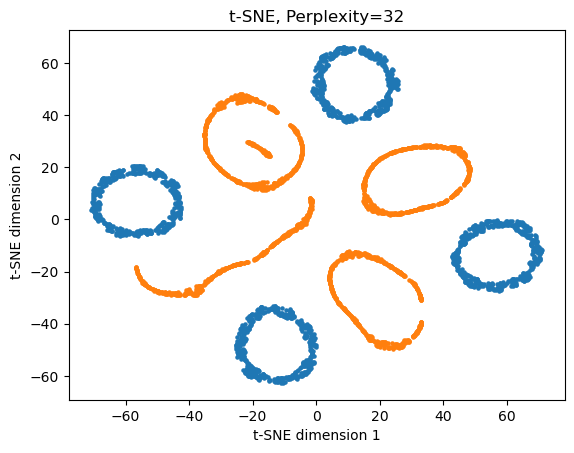

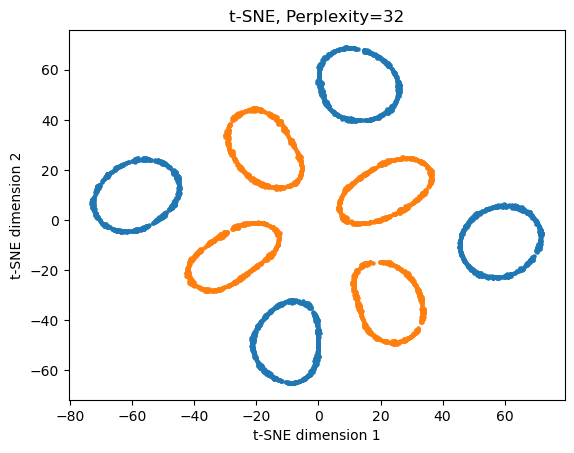

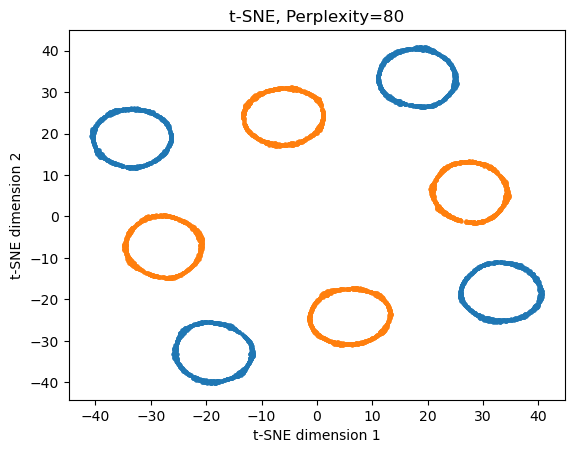

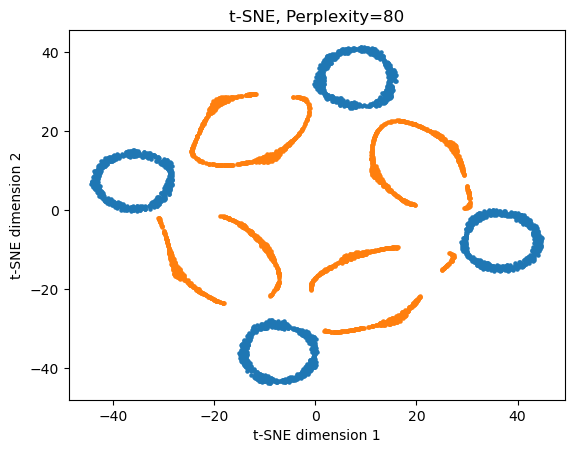

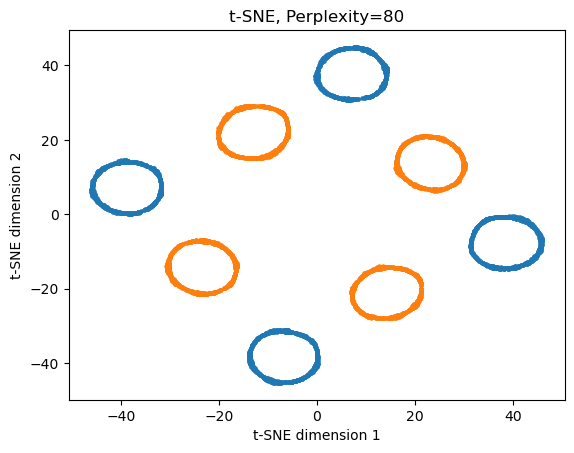

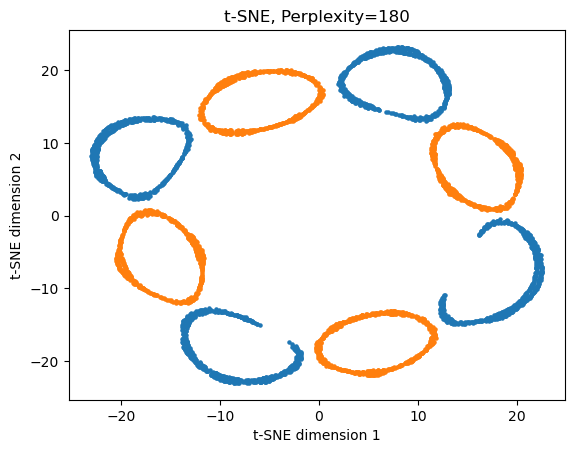

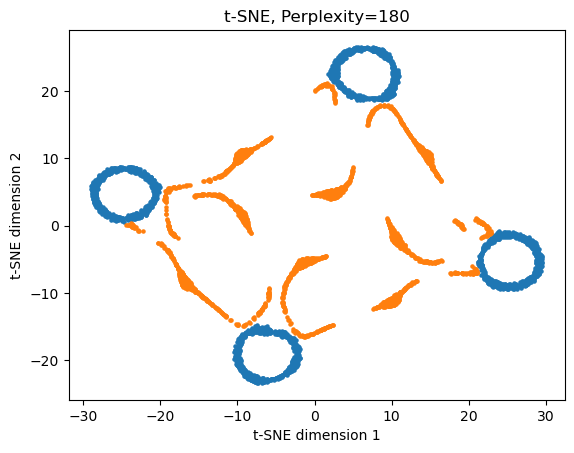

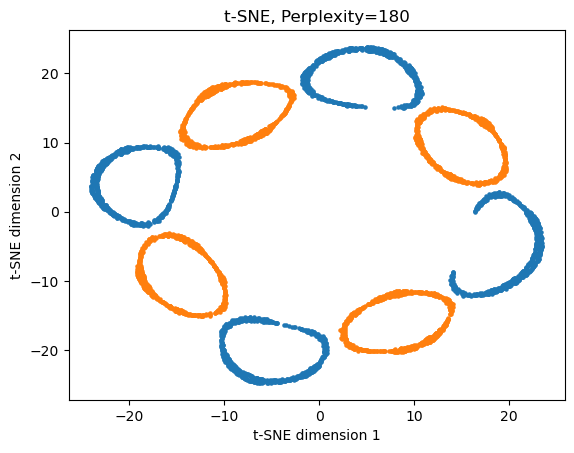

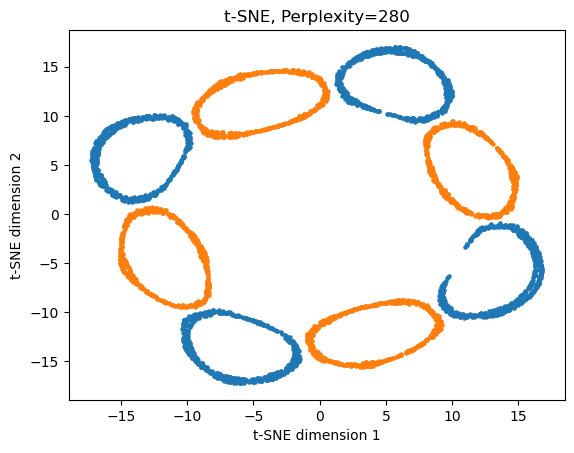

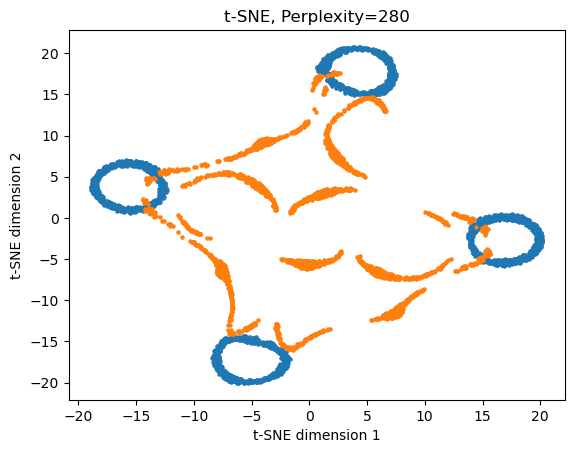

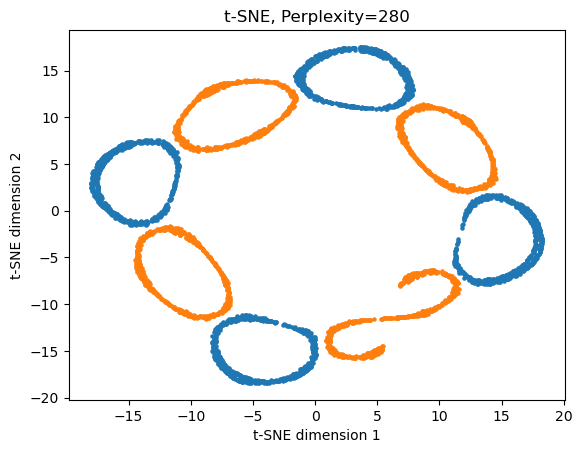

In [25]:
for perplexity in [32,80,180,280]:
    tsne_plot(data=data, init = "random", perplexity=perplexity,init_name="random")
    tsne_plot(data=data_norm, init = pca_projection_norm, perplexity=perplexity, init_name="pca")
    tsne_plot(data, init = pca_projection_norm, perplexity=perplexity, init_name="pca_original")